# MARATONA BEHIND THE CODE 2021

## DESAFIO 3: GFT

##### Autor: Rodrigo Oliveira
##### LinkedIn: https://www.linkedin.com/in/rodrigolima82/

# Parte 01. Importando as bibliotecas

In [1]:
# Pacotes padrao
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# APRIORI FUNCTION 
from mlxtend.frequent_patterns import apriori, association_rules

# ITERTOOLS 
import itertools

# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option("max_colwidth", None)
pd.options.display.float_format = '{:.2f}'.format

# Parte 02. Carregando o Dataset

In [2]:
# Carregando o dataset InsuranceCompanyABC
insuranceDF = pd.read_csv('../data/InsuranceCompanyABC.csv')
insuranceDF['ID'] = insuranceDF['ID'].astype(int)

# Visualizando os primeiros registros
print(insuranceDF.shape)
insuranceDF.head()

(10082, 9)


,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial
0,71504,42.99,4428.51,NE,1.00,T,T,T,T
1,59751,26.37,4489.93,CO,0.00,T,T,T,T
2,11877,46.98,4567.74,CO,0.00,F,F,F,F
3,33701,24.31,4592.13,NE,0.00,F,F,F,F
4,62029,28.90,4723.20,SE,1.00,F,F,F,F


In [3]:
# Carregando o dataset InvestmentBankCDE
investmentDF = pd.read_csv('../data/InvestmentBankCDE.csv')
investmentDF['ID'] = investmentDF['ID'].astype(int)

# Visualizando os primeiros registros
print(investmentDF.shape)
investmentDF.head()

(10082, 8)


,ID,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto
0,71504,F,F,F,F,F,F,F
1,59751,F,F,F,F,F,F,F
2,11877,F,F,F,F,F,F,F
3,33701,T,T,T,T,T,T,T
4,62029,F,F,T,F,T,T,F


In [4]:
# Carregando o dataset RetailBankEFG
retailDF = pd.read_csv('../data/RetailBankEFG.csv')
retailDF['ID'] = retailDF['ID'].astype(int)

# Visualizando os primeiros registros
print(retailDF.shape)
retailDF.head()

(10082, 10)


,ID,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos
0,71504,T,T,T,T,T,F,F,T,F
1,59751,T,T,T,T,T,F,F,F,T
2,11877,F,F,F,F,F,F,F,F,F
3,33701,F,F,F,F,F,F,F,F,F
4,62029,F,T,T,T,T,T,T,T,T


In [ ]:
# Carregando o dataset ANSWERS
answersDF = pd.read_csv('../data/ANSWERS.csv')
answersDF['ID'] = answersDF['ID'].astype(int)

# Visualizando os primeiros registros
print(answersDF.shape)
answersDF.head()

In [5]:
# Realizando o Join dos 3 datasets
joinDF = insuranceDF.join(investmentDF.set_index('ID'), on='ID', how='inner')
fullDF = joinDF.join(retailDF.set_index('ID'), on='ID', how='inner')

fullDF.rename(columns={'seguro auto': 'seguro_auto',
                       'seguro vida Emp': 'seguro_vida_emp', 
                       'seguro vida PF': 'seguro_vida_pf', 
                       'Seguro Residencial': 'seguro_residencial', 
                       'Investimento Fundos_cambiais': 'investimento_fundos_cambiais',
                       'Investimento Fundos_commodities': 'investimento_fundos_commodities',
                       'Investimento LCI': 'investimento_lci',
                       'Investimento LCA': 'investimento_lca',
                       'Investimento Poupanca': 'investimento_poupanca',
                       'Investimento Fundos Multimercado': 'investimento_fundos_multimercado',
                       'Investimento Tesouro Direto': 'investimento_tesouro_direto',
                       'Financiamento Casa': 'financiamento_casa',
                       'Financiamento Carro': 'financiamento_carro',
                       'Emprestimo _pessoal': 'emprestimo_pessoal',
                       'Emprestimo _consignado': 'emprestimo_consignado',
                       'Emprestimo _limite_especial': 'emprestimo_limite_especial',
                       'Emprestimo _educacao': 'emprestimo_educacao',
                       'Emprestimo _viagem': 'emprestimo_viagem',
                       'Investimento CDB': 'investimento_cdb',
                       'Investimento Fundos': 'investimento_fundos'}, inplace=True)


idx_col = ['Idade','Renda','Regiao','Genero']

list_products = ['seguro_auto', 'seguro_vida_emp', 'seguro_vida_pf', 'seguro_residencial', 
                 'investimento_fundos_cambiais','investimento_fundos_commodities','investimento_lci',                 
                 'investimento_lca','investimento_poupanca','investimento_fundos_multimercado',
                 'investimento_tesouro_direto','financiamento_casa','financiamento_carro',
                 'emprestimo_pessoal','emprestimo_consignado','emprestimo_limite_especial',
                 'emprestimo_educacao','emprestimo_viagem','investimento_cdb','investimento_fundos']                

fullDF = fullDF.drop(idx_col, axis = 1)
fullDF = fullDF.set_index('ID')[list_products]

# Criando instancia do LabelEncoder
def encode_units(x):
    if x == 'F':
        return 0 
    if x == 'T':
        return 1
    
fullDF = fullDF.applymap(encode_units)

In [6]:
fullDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13730 entries, 71504 to 85914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   seguro_auto                       13730 non-null  int64
 1   seguro_vida_emp                   13730 non-null  int64
 2   seguro_vida_pf                    13730 non-null  int64
 3   seguro_residencial                13730 non-null  int64
 4   investimento_fundos_cambiais      13730 non-null  int64
 5   investimento_fundos_commodities   13730 non-null  int64
 6   investimento_lci                  13730 non-null  int64
 7   investimento_lca                  13730 non-null  int64
 8   investimento_poupanca             13730 non-null  int64
 9   investimento_fundos_multimercado  13730 non-null  int64
 10  investimento_tesouro_direto       13730 non-null  int64
 11  financiamento_casa                13730 non-null  int64
 12  financiamento_carro         

# Parte 03. EDA

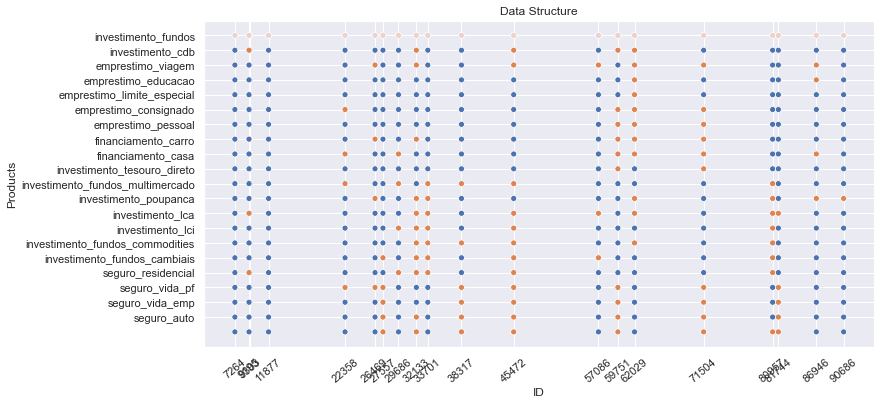

In [7]:
p  = fullDF.head(20).copy()
df = p.copy()

sns.set(rc={'figure.figsize':(12, 6)})

for i in range(0, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Products')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(df.index)
    g.set_yticklabels(df.columns)
    g.set_xticklabels(df.index, rotation=40)
    plt.title("Data Structure")

In [8]:
df.sum()

seguro_auto                         8
seguro_vida_emp                     7
seguro_vida_pf                      6
seguro_residencial                  8
investimento_fundos_cambiais        6
investimento_fundos_commodities     6
investimento_lci                    6
investimento_lca                    5
investimento_poupanca               8
investimento_fundos_multimercado    8
investimento_tesouro_direto         6
financiamento_casa                  2
financiamento_carro                 7
emprestimo_pessoal                  6
emprestimo_consignado               3
emprestimo_limite_especial          4
emprestimo_educacao                 2
emprestimo_viagem                   2
investimento_cdb                    7
investimento_fundos                 5
dtype: int64

# Parte 04. Tratamento dos dados

In [9]:
# Product Frequency / Total
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
seguro_auto,0.40
investimento_poupanca,0.40
seguro_residencial,0.40
investimento_fundos_multimercado,0.40
investimento_cdb,0.35
financiamento_carro,0.35
seguro_vida_emp,0.35
emprestimo_pessoal,0.30
investimento_tesouro_direto,0.30
investimento_lci,0.30


In [11]:
# Elimination by Support Value
first[first.Support >= 0.10]

,Support
seguro_auto,0.40
investimento_poupanca,0.40
seguro_residencial,0.40
investimento_fundos_multimercado,0.40
investimento_cdb,0.35
financiamento_carro,0.35
seguro_vida_emp,0.35
emprestimo_pessoal,0.30
investimento_tesouro_direto,0.30
investimento_lci,0.30


In [12]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
second[:10]

[['seguro_auto', 'investimento_poupanca'],
 ['seguro_auto', 'seguro_residencial'],
 ['seguro_auto', 'investimento_fundos_multimercado'],
 ['seguro_auto', 'investimento_cdb'],
 ['seguro_auto', 'financiamento_carro'],
 ['seguro_auto', 'seguro_vida_emp'],
 ['seguro_auto', 'emprestimo_pessoal'],
 ['seguro_auto', 'investimento_tesouro_direto'],
 ['seguro_auto', 'investimento_lci'],
 ['seguro_auto', 'investimento_fundos_commodities']]

In [ ]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = df.T.loc[second[i]].sum() 
    temp = len(temp[temp == df.T.loc[second[i]].shape[0]]) / df.shape[0]
    value.append(temp)

# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration.head()

In [13]:
def ar_iterations(data, num_iter = 1, support_value = 0.1, iterationIndex = None):
    
    # Next Iterations
    def ar_calculation(iterationIndex = iterationIndex): 
        
        # Calculation of support value
        value = []
        for i in range(0, len(iterationIndex)):
            result = data.T.loc[iterationIndex[i]].sum() 
            result = len(result[result == data.T.loc[iterationIndex[i]].shape[0]]) / data.shape[0]
            value.append(result)
        
        # Bind results
        result = pd.DataFrame(value, columns = ["Support"])
        result["index"] = [tuple(i) for i in iterationIndex]
        result['length'] = result['index'].apply(lambda x:len(x))
        result = result.set_index("index").sort_values("Support", ascending = False)
        
        # Elimination by Support Value
        result = result[result.Support > support_value]
        return result    
    
    # First Iteration
    first = pd.DataFrame(df.T.sum(axis = 1) / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
    first = first[first.Support > support_value]
    first["length"] = 1
    
    if num_iter == 1:
        res = first.copy()
        
    # Second Iteration
    elif num_iter == 2:
        
        second = list(itertools.combinations(first.index, 2))
        second = [list(i) for i in second]
        res = ar_calculation(second)
        
    # All Iterations > 2
    else:
        nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter))
        nth = [list(i) for i in nth]
        res = ar_calculation(nth)
    
    return res

In [14]:
iteration1 = ar_iterations(df, num_iter=1, support_value=0.1)
iteration1.head()

,Support,length
seguro_auto,0.40,1
investimento_poupanca,0.40,1
seguro_residencial,0.40,1
investimento_fundos_multimercado,0.40,1
investimento_cdb,0.35,1


In [15]:
iteration2 = ar_iterations(df, num_iter=2, support_value=0.1)
iteration2.head()

,Support,length
index,,
"(seguro_auto, seguro_vida_emp)",0.35,2
"(seguro_auto, seguro_residencial)",0.30,2
"(seguro_vida_emp, seguro_vida_pf)",0.30,2
"(seguro_residencial, seguro_vida_emp)",0.30,2
"(seguro_auto, seguro_vida_pf)",0.30,2


In [16]:
iteration3 = ar_iterations(df, num_iter=3, support_value=0.01, iterationIndex=iteration2.index)
iteration3.head()

,Support,length
index,,
"(seguro_auto, seguro_vida_emp, seguro_residencial)",0.30,3
"(seguro_auto, seguro_residencial, seguro_vida_pf)",0.30,3
"(seguro_auto, seguro_vida_emp, seguro_vida_pf)",0.30,3
"(seguro_vida_emp, seguro_residencial, seguro_vida_pf)",0.30,3
"(investimento_lca, investimento_fundos_cambiais, investimento_fundos_commodities)",0.20,3


# Parte 05. Modelagem Preditiva

In [20]:
# Apriori
freq_items = apriori(df, min_support = 0.1, max_len=3, use_colnames = True, verbose = 2)
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items.sort_values("support", ascending = False).head()

Processing 2418 combinations | Sampling itemset size 3


,support,itemsets,length
0,0.40,(seguro_auto),1
8,0.40,(investimento_poupanca),1
3,0.40,(seguro_residencial),1
9,0.40,(investimento_fundos_multimercado),1
18,0.35,(investimento_cdb),1


In [22]:
freq_items[ (freq_items['length'] == 3) ].head()

,support,itemsets,length
138,0.30,"(seguro_vida_pf, seguro_auto, seguro_vida_emp)",3
139,0.30,"(seguro_residencial, seguro_auto, seguro_vida_emp)",3
140,0.10,"(investimento_fundos_cambiais, seguro_auto, seguro_vida_emp)",3
141,0.15,"(investimento_fundos_commodities, seguro_auto, seguro_vida_emp)",3
142,0.15,"(investimento_lci, seguro_auto, seguro_vida_emp)",3


# Parte 06. Realizando Previsoes

In [26]:
# We can create our rules by defining metric and its threshold.

rules = association_rules(freq_items, metric="confidence", min_threshold=0.8)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("confidence",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
225,"(emprestimo_consignado, seguro_residencial)",(seguro_vida_pf),0.10,0.30,0.10,1.00,3.33,0.07,inf,2,1
303,"(investimento_fundos_cambiais, investimento_cdb)",(investimento_lci),0.10,0.30,0.10,1.00,3.33,0.07,inf,2,1
300,"(investimento_fundos_cambiais, investimento_lci)",(investimento_poupanca),0.20,0.40,0.20,1.00,2.50,0.12,inf,2,1
297,"(investimento_fundos_cambiais, investimento_lci)",(investimento_lca),0.20,0.25,0.20,1.00,4.00,0.15,inf,2,1
296,"(investimento_lca, investimento_lci)",(investimento_fundos_cambiais),0.20,0.30,0.20,1.00,3.33,0.14,inf,2,1


In [28]:
rules[(rules.support >= 0.10) & (rules.confidence >= 0.8) ].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
225,"(emprestimo_consignado, seguro_residencial)",(seguro_vida_pf),0.10,0.30,0.10,1.00,3.33,0.07,inf,2,1
303,"(investimento_fundos_cambiais, investimento_cdb)",(investimento_lci),0.10,0.30,0.10,1.00,3.33,0.07,inf,2,1
300,"(investimento_fundos_cambiais, investimento_lci)",(investimento_poupanca),0.20,0.40,0.20,1.00,2.50,0.12,inf,2,1
297,"(investimento_fundos_cambiais, investimento_lci)",(investimento_lca),0.20,0.25,0.20,1.00,4.00,0.15,inf,2,1
296,"(investimento_lca, investimento_lci)",(investimento_fundos_cambiais),0.20,0.30,0.20,1.00,3.33,0.14,inf,2,1
294,"(investimento_fundos_commodities, investimento_fundos)",(investimento_fundos_cambiais),0.10,0.30,0.10,1.00,3.33,0.07,inf,2,1
293,"(investimento_fundos_cambiais, investimento_cdb)",(investimento_fundos_commodities),0.10,0.30,0.10,1.00,3.33,0.07,inf,2,1
292,"(investimento_fundos_commodities, investimento_tesouro_direto)",(investimento_fundos_cambiais),0.15,0.30,0.15,1.00,3.33,0.10,inf,2,1
291,"(investimento_fundos_multimercado, investimento_fundos_commodities)",(investimento_fundos_cambiais),0.15,0.30,0.15,1.00,3.33,0.10,inf,2,1
290,"(investimento_fundos_cambiais, investimento_fundos_multimercado)",(investimento_fundos_commodities),0.15,0.30,0.15,1.00,3.33,0.10,inf,2,1


# Parte 07. Salvar resultado